<a href="https://colab.research.google.com/github/StevenKim1105/StevenKim1105/blob/main/landslide_segmentation_pytorch_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PyTorch Tutorial for Pixel-wise Classification of Landslides from Satellite Images**

## **Goal of this tutorial**:


1.   Get hands-on experience with Google Colab.
2.   Understand basics of Convolutional Neural Networks.
3.   Understand basics of Semantic Segmentation.
3.   Build a PyTorch Image Segmentation Pipeline:
  - Download data from Google Drive.
  - Visualize downloaded data.
  - Build Custom DataLoader with Image Augmentations on the fly.
  - Build a neural network for pixel-wise classification of images.
  - Train the neural network on a GPU device and observe decrease of loss.
  - Save trained model for inference.

If this notebook is useful, please cite the following reference:
Savinay Nagendra, Daniel Kifer, Benjamin Mirus, Te Pei, Kathryn Lawson, Srikanth Banagere Manjunatha, Weixin Li, Hien Nguyen, Tong Qiu, Sarah Tran, and Chaopeng Shen, Constructing a Large-scale Landslide Database Across Heterogeneous Environments Using Task-Specific Model Updates, IEEE Journal of Selected Topics in Applied Earth Observations and Remote Sensing (2022), doi: 10.1109/JSTARS.2022.3177025.




# **Convolutional Neural Networks (CNNs/ConvNets)**

![Alt Text](https://miro.medium.com/max/790/1*1VJDP6qDY9-ExTuQVEOlVg.gif)

A ConvNet takes an input image and assigns importance (learnable weights and biases) to various aspects and objects in the image to be able to differentiate one from another. The pre-processing required in a ConvNet is much lower as compared to other classical image processing algorithms which use hand-engineered features. 

Convolutional Neural Networks are very similar to ordinary Neural Networks.  

*   They are made up of neurons that have learnable weights and biases.
*   Each neuron receives some inputs, performs a dot product and optionally follows it with a non-linearity.
*   The whole network still expresses a single differentiable score function.
*   They still have a loss function on the last layer.


## **So what changes?**
 

*   ConvNet architectures make the explicit assumption that the inputs are images, which allows us to encode certain properties into the architecture. These then make the forward function more efficient to implement and vastly reduce the amount of parameters in the network.
*   Convolutional Neural Networks take advantage of the fact that the input consists of **images** and they constrain the architecture in a more sensible way. In particular, unlike a regular Neural Network, the layers of a ConvNet have neurons arranged in 3 dimensions: **width, height, depth**.

<img src='https://drive.google.com/uc?id=1k5DGTPBE9y-Zar8slqRMj3Vz9xVwar1P'>

*    A ConvNet is able to successfully capture the **Spatial** and **Temporal** dependencies in an image through the application of relevant filters.

## **How do ConvNets work?**


*     A filter of weights moves to the right with a certain Stride Value till it parses the complete width. Moving on, it hops down to the beginning (left) of the image with the same Stride Value and repeats the process until the entire image is traversed.

<img src='https://drive.google.com/uc?id=1jZRpMXun7l01nbQoj9knry1IdH9Gpzwu'>

![Alt Text](https://miro.medium.com/max/1400/1*ciDgQEjViWLnCbmX-EeSrA.gif
)

*     In the case of images with multiple channels (e.g. RGB), the Kernel has the same depth as that of the input image. Matrix Multiplication is performed between Kn and In stack ([K1, I1]; [K2, I2]; [K3, I3]) and all the results are summed with the bias to give us a squashed one-depth channel Convoluted Feature Output.


The objective of the Convolution Operation is to extract the **high-level features** such as **edges**, from the input image. ConvNets need not be limited to only one Convolutional Layer. Conventionally, the first ConvLayer is responsible for capturing the Low-Level features such as **edges**, **color**, **gradient** **orientation**, etc. With added layers, the architecture adapts to the High-Level features as well, giving us a network which has the wholesome understanding of images in the dataset, similar to how we would.

<img src='https://cs231n.github.io/assets/cnn/weights.jpeg'>


For detailed information about convolutional neural netwoks, visit:
https://cs231n.github.io/convolutional-networks/


**The brain view**. If you’re a fan of the brain/neuron analogies, every entry in the 3D output volume can also be interpreted as an output of a neuron that looks at only a small region in the input and shares parameters with all neurons to the left and right spatially (since these numbers all result from applying the same filter).

<img src='https://cs231n.github.io/assets/cnn/depthcol.jpeg'>

**Local Connectivity**. When dealing with high-dimensional inputs such as images,  it is impractical to connect neurons to all neurons in the previous volume. Instead, we will connect each neuron to only a local region of the input volume. The spatial extent of this connectivity is a hyperparameter called the receptive field of the neuron (equivalently this is the filter size). The extent of the connectivity along the depth axis is always equal to the depth of the input volume. It is important to emphasize again this asymmetry in how we treat the spatial dimensions (width and height) and the depth dimension: The connections are local in 2D space (along width and height), but always full along the entire depth of the input volume.

# **Semantic Segmentation**
![Alt Text](https://miro.medium.com/max/960/1*dJRA7-IjccrkCWw86V-oUg.gif)

**A way to understand what objects are in an image - pixel-wise classification.**


*   Image segmentation is a method in which a digital image is broken down into various subgroups called Image segments which helps in reducing the complexity of the image to make further processing or analysis of the image simpler. 

*   Segmentation in easy words is assigning labels to pixels. All picture elements or pixels belonging to the same category have a common label assigned to them.

## **Deep Learning based Segmentation**

The basic architecture in image segmentation consists of an encoder and a decoder.

The encoder extracts features from the image through filters. The decoder is responsible for generating the final output which is usually a segmentation mask containing the outline of the object. Most of the architectures have this architecture or a variant of it.

<img src='https://miro.medium.com/max/940/0*v_KWTZcaAw-DRxmv.png'>

Components of deep learning:
1. Pooling (Method to decrease resolution) <br>
Types: Max Pooling, Min Pooling, Average Pooling

![Alt Text](https://camo.githubusercontent.com/6d0f5eac1c020be6f540df82378de7cc1570c1ba500b7e83ee6377e10a508ecc/68747470733a2f2f6d6c6e6f7465626f6f6b2e6769746875622e696f2f696d672f434e4e2f706f6f6c6669672e676966)

2. Batch Normalization

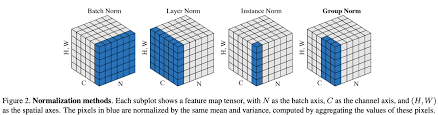

3. ReLU Activation (Non-Linearity)

max(0, z)
<img src='https://miro.medium.com/max/1400/1*DfMRHwxY1gyyDmrIAd-gjQ.png'>




# **Our Goal**
To build a PyTorch pipeline to take as inputs, {pre-event, post-event} images from our dataset and train a U-Net model to obtain a binary prediction map that contains the localization of landslide events in the post-event image. 
<img src='https://drive.google.com/uc?id=1CYonZVpQJxriIkFAmIIzso9Gw2-a2733'>

The idea to provide pre-event image is to provide context of the region without landslides to the model, so that the model can learn to pick out differences between the two images. These differences are then learnt to be filtered based on the pixel-wise annotated  target image which marks where the landslides are in the image.


# Download and Unzip dataset

In [ ]:
# Download data from drive
!wget -O ./data.zip "https://www.dropbox.com/s/u5ku7zca3nxn3fx/data.zip?dl=0?dl=1"
# Unzip downloaded data
!unzip -o 'data.zip'
# Install dependencies
!pip install torchmetrics

--2022-12-18 04:45:25--  https://www.dropbox.com/s/u5ku7zca3nxn3fx/data.zip?dl=0?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/u5ku7zca3nxn3fx/data.zip [following]
--2022-12-18 04:45:26--  https://www.dropbox.com/s/raw/u5ku7zca3nxn3fx/data.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca98606182c8145ec49a9ecffd8.dl.dropboxusercontent.com/cd/0/inline/By1sLqKMTpIOwSlnsmPfsBBm5mLNYgaiJcuWRzny02lYN5M1UB_GeTIgWjgAQaxlEdfmbuzfGuHxLNu4Jvq8xe6Kuf5oeuJULPgI76c1TftlTKWSr7nDAm1JPUb1iBRz3h6Fm-_5SWKAvOvyhB5Vdqf6CADpRu6aq5C_kNhY9gWiRQ/file# [following]
--2022-12-18 04:45:26--  https://uca98606182c8145ec49a9ecffd8.dl.dropboxusercontent.com/cd/0/inline/By1sLqKMTpIOwSlnsmPfsBBm5mLNYgaiJcuWRzny02lYN5M1UB_GeTIgWjgAQaxlEdfmbuzfGuHxLNu

# Code


# Import Packages


In [ ]:
# Import necessary packages
import torch
import os
import cv2
import numpy as np
from torch.utils.data import Dataset
from torchvision import transforms, datasets, utils
import matplotlib.pyplot as plt
import pandas as pd
import torchvision.transforms.functional as TF
import random
from torch.utils.data import DataLoader
import torch.nn as nn 
from torchsummary import summary
import time
from tqdm import tqdm
from torchmetrics import JaccardIndex
%matplotlib inline
plt.rcParams.update(plt.rcParamsDefault)

# Functions

In [ ]:
# Function to create CSV file for train and test
def create_csv():
    train_dict = {}
    test_dict = {}

    train_dict['pre'] = sorted(os.listdir(TRAIN_PRE_DIR))
    if 'desktop.ini' in train_dict['pre']:
        train_dict['pre'].remove('desktop.ini')
    train_dict['post'] = sorted(os.listdir(TRAIN_POST_DIR))
    train_dict['target'] = sorted(os.listdir(TRAIN_TARGET_DIR))

    test_dict['pre'] = sorted(os.listdir(TEST_PRE_DIR))
    if 'desktop.ini' in test_dict['pre']:
        test_dict['pre'].remove('desktop.ini')
    test_dict['post'] = sorted(os.listdir(TEST_POST_DIR))
    test_dict['target'] = sorted(os.listdir(TEST_TARGET_DIR))


    train_df = pd.DataFrame.from_dict(train_dict)
    test_df = pd.DataFrame.from_dict(test_dict)

    if not os.path.exists(os.path.join(DATA_DIR, 'train.csv')):
        train_df.to_csv(os.path.join(DATA_DIR, 'train.csv'), index = False)
    if not os.path.exists(os.path.join(DATA_DIR, 'test.csv')):
        test_df.to_csv(os.path.join(DATA_DIR, 'test.csv'), index = False)

    print('[INFO] Train and Test csv files have been created ...')

# Function to plot samples
def plot_samples(dataset, num_samples):
    for i in range(len(dataset)):
        if i == num_samples:
            break
        sample = dataset[i]
        fig, axs = plt.subplots(1,3,figsize=(15,3))
        axs[0].imshow(sample[0].numpy()[:,:,:3])
        axs[0].axis('off')
        axs[0].set_title('Pre-Image')
        axs[1].imshow(sample[0].numpy()[:,:,3:])
        axs[1].axis('off')
        axs[1].set_title('Post-Image')
        axs[2].imshow(sample[1][:,:,0])
        axs[2].axis('off')
        axs[2].set_title('Target-Image')
        plt.show()

# Hyperparameters and Constants

In [ ]:
# Working directory (root)
WORKING_DIR = os.getcwd()
# Basepath of dataset
DATA_DIR = os.path.join(WORKING_DIR, 'data')
# Training and Test directories
TRAIN_DIR = os.path.join(DATA_DIR, 'train')
TEST_DIR = os.path.join(DATA_DIR, 'test')
# Image and label directories: Train
TRAIN_POST_DIR = os.path.join(TRAIN_DIR, 'post')
TRAIN_PRE_DIR = os.path.join(TRAIN_DIR, 'pre')
TRAIN_TARGET_DIR = os.path.join(TRAIN_DIR, 'target')
# Image and label directories: Test
TEST_POST_DIR = os.path.join(TEST_DIR, 'post')
TEST_PRE_DIR = os.path.join(TEST_DIR, 'pre')
TEST_TARGET_DIR = os.path.join(TEST_DIR, 'target')
# Output and Checkpoint directories
MODEL_DIR = os.path.join(WORKING_DIR, 'checkpoints')
if not os.path.exists(MODEL_DIR):
    os.makedirs(MODEL_DIR)
RESULTS_DIR = os.path.join(WORKING_DIR, 'results')
if not os.path.exists(RESULTS_DIR):
    os.makedirs(RESULTS_DIR)
# Device (GPU or CPU)
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
# Determine if we will be pinning memory during data loading
PIN_MEMORY = True if DEVICE == "cuda" else False
# Initialize learning rate, number of epochs and batch size
INIT_LR = 0.001
NUM_EPOCHS = 5
BATCH_SIZE = 2
# Input image dimensions
IMAGE_WIDTH = 512
IMAGE_HEIGHT = 512
# Threshold to separate forground from background 
THRESHOLD = 0.5
# Train root directories
TRAIN_ROOT_DIR = [TRAIN_PRE_DIR, TRAIN_POST_DIR, TRAIN_TARGET_DIR]
# Test root directories
TEST_ROOT_DIR = [TEST_PRE_DIR, TEST_POST_DIR, TEST_TARGET_DIR]
# Inference (1) of Train (0) mode
INFERENCE_MODE = 0
# Number of Test Runs
NUM_TEST_RUNS = 5

In [ ]:
!nvidia-smi

Sun Dec 18 04:46:05 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P0    27W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Create Custom Landslide Dataset with Augmentations

To build a powerful image classifier using very little training data, image augmentation is usually required to boost the performance of deep networks. Image augmentation artificially creates training images through different ways of processing or combination of multiple processing, such as random rotation, shifts, shear and flips, etc.

<img src='https://miro.medium.com/max/796/0*4hDscg489eopmyaz'>

In [ ]:
# Custom Image Dataset: PyTorch
class LandslideDataset(Dataset):
    ''' Landslide Dataset: (pre, post, target) '''

    def __init__(self, csv_file, root_dir, resize, transform = None):
        '''
        csv_file (string): File name containing (pre, post, target) file names.
        root_dir (string): Directory where pre, post and target folders exist.
        resize (tuple): Tuple of resize integers. [eg: (512,512)]
        transform (callable, optional): Optional transform to be applied on a sample.
        '''
        self.transform = transform
        self.dataframe = pd.read_csv(os.path.join(DATA_DIR, csv_file))
        self.root_dir = root_dir
        self.resize = resize

    def transform_function(self, pre, post, target):
        # Convert first to PIL Image to apply data augmentations
        # PIL Image accepts channels last
        pre = pre.permute(2,0,1)
        pre = transforms.ToPILImage()(pre)
        post = post.permute(2,0,1)
        post = transforms.ToPILImage()(post)
        target = target.permute(2,0,1)
        target = transforms.ToPILImage()(target)

        if self.transform:
            # Random horizontal flipping
            if random.random() > 0.5:
                pre = TF.hflip(pre)
                post = TF.hflip(post)
                target = TF.hflip(target)

            # Random vertical flipping
            if random.random() > 0.5:
                pre = TF.vflip(pre)
                post = TF.vflip(post)
                target = TF.vflip(target)

            # Random rotation
            if random.random() > 0.5:
                pre = TF.rotate(pre, 10)
                post = TF.rotate(post, 10)
                target = TF.rotate(target, 10)

        return np.array(pre), np.array(post), np.array(target)

    def __len__(self):
        return len(self.dataframe)
    
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        pre_img_path = os.path.join(self.root_dir[0], self.dataframe.iloc[idx,0])
        post_img_path = os.path.join(self.root_dir[1], self.dataframe.iloc[idx,1])
        target_path = os.path.join(self.root_dir[2], self.dataframe.iloc[idx,2])

        # Pre Image
        pre_img = cv2.imread(pre_img_path)
        pre_img = cv2.cvtColor(pre_img, cv2.COLOR_BGR2RGB)
        pre_img = cv2.resize(pre_img, self.resize, interpolation = cv2.INTER_AREA)
        pre_img = np.array(pre_img)
        pre_img = pre_img.astype('uint8')

        # Post Image
        post_img = cv2.imread(post_img_path)
        post_img = cv2.cvtColor(post_img, cv2.COLOR_BGR2RGB)
        post_img = cv2.resize(post_img, self.resize, interpolation = cv2.INTER_AREA)
        post_img = np.array(post_img)
        post_img = post_img.astype('uint8')

        # Target Image
        target_img = cv2.imread(target_path, 0)
        target_img = cv2.resize(target_img, self.resize, interpolation = cv2.INTER_AREA)
        target_img = np.array(target_img)
        target_img = target_img // 38
        target_img = np.expand_dims(target_img, -1)

        pre_img = torch.from_numpy(pre_img)
        post_img = torch.from_numpy(post_img)
        target_img = torch.from_numpy(target_img)

        # Augment image
        pre, post, target = self.transform_function(pre_img, post_img, target_img)
        
        # Concatenate pre and post (input will have 6 channels)
        image = np.concatenate((pre, post), axis = -1)
        image = torch.from_numpy(image)
        target = np.expand_dims(target, axis = -1)
        target = torch.from_numpy(target)
        return image, target

# Create Data Loader

In [ ]:
# Create Pytorch DataSet and iterative Data Loader
create_csv()
train_dataset = LandslideDataset('train.csv', TRAIN_ROOT_DIR, (512,512), transform=True)
print('Training Dataset')
trainLoader = DataLoader(train_dataset, shuffle=True,
	batch_size = BATCH_SIZE, pin_memory=PIN_MEMORY)
test_dataset = LandslideDataset('test.csv', TEST_ROOT_DIR, (512,512), transform=True)
print('Test Dataset')
testLoader = DataLoader(test_dataset, shuffle=True,
	batch_size = BATCH_SIZE, pin_memory=PIN_MEMORY)

[INFO] Train and Test csv files have been created ...
Training Dataset
Test Dataset


# Visualize Samples from dataset

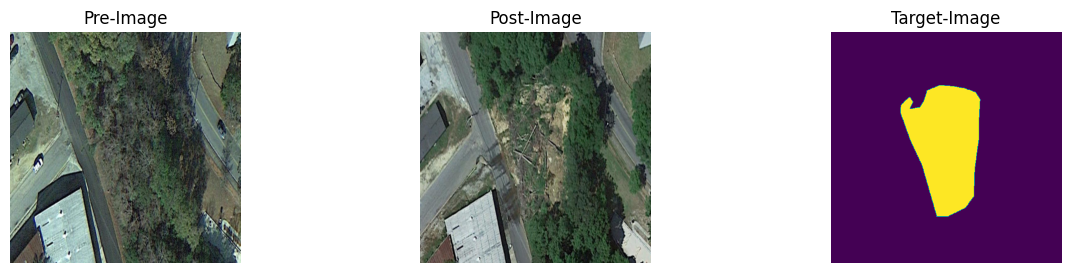

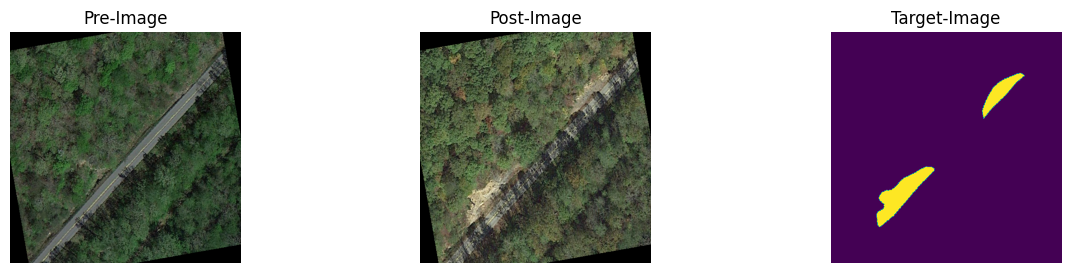

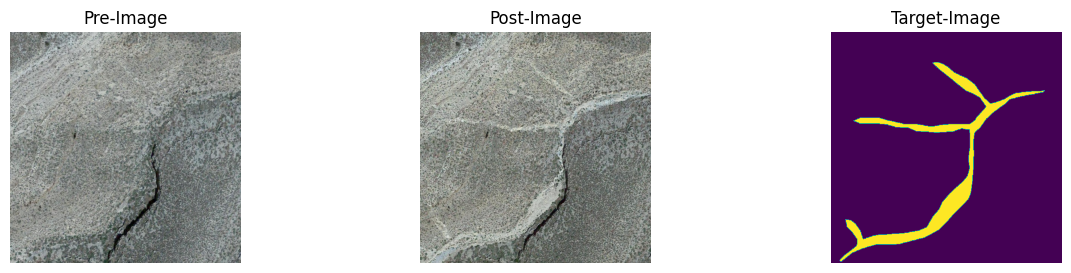

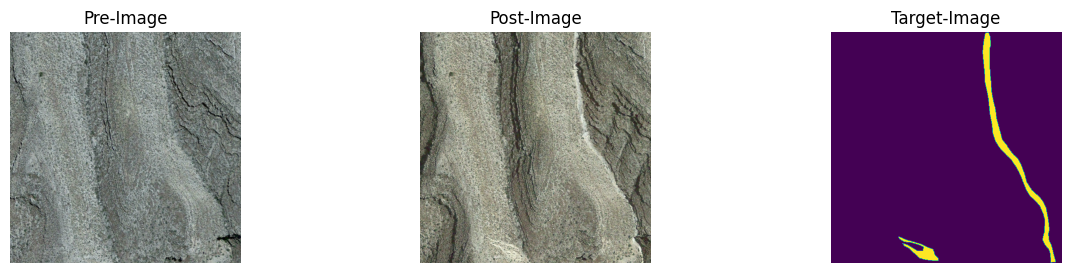

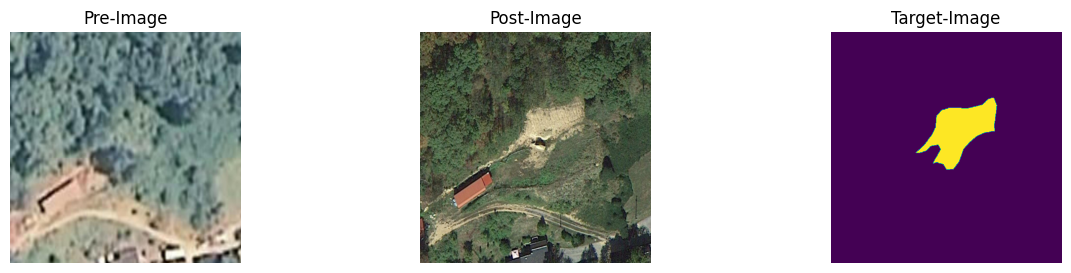

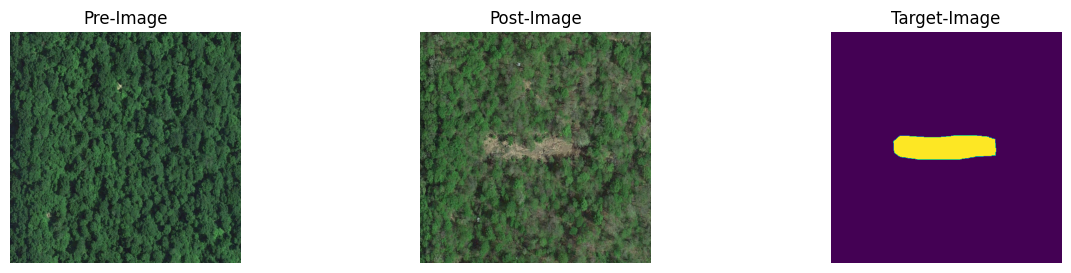

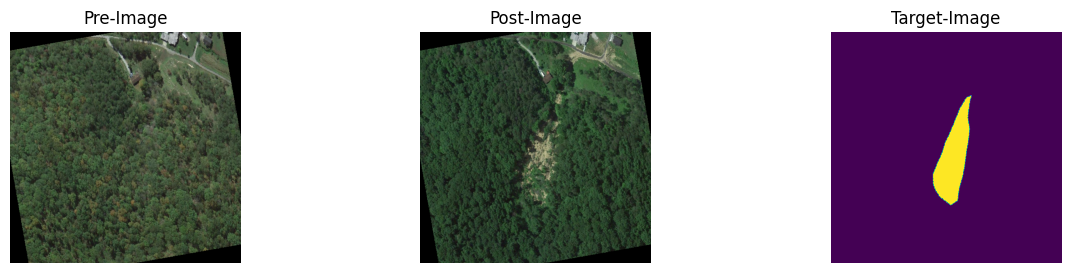

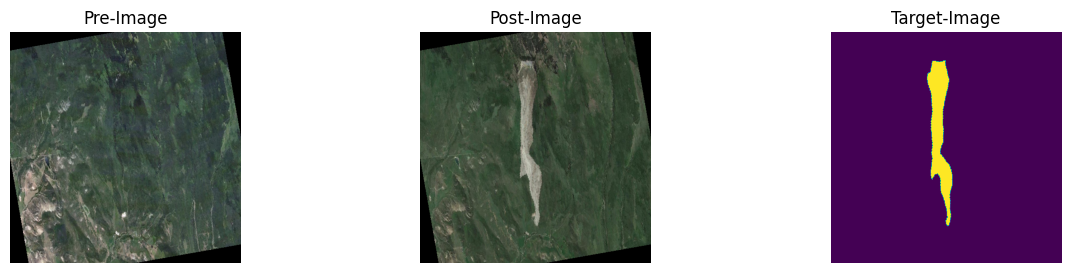

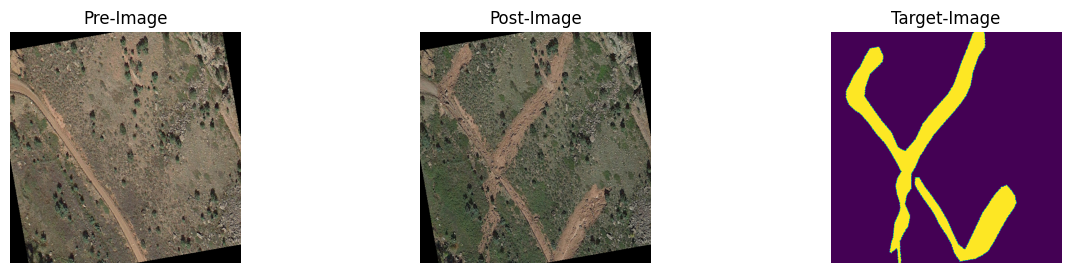

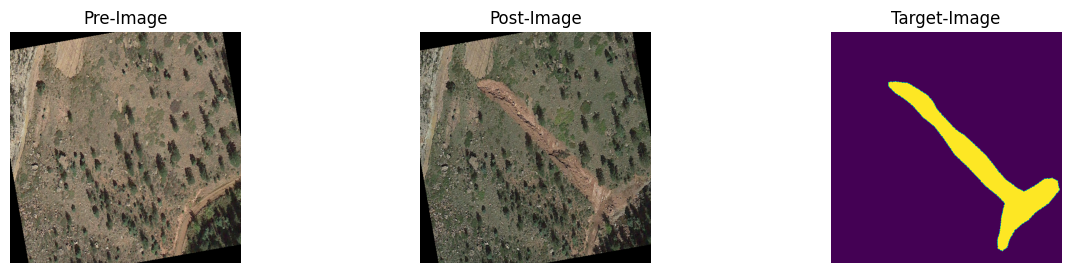

In [ ]:
plot_samples(test_dataset, num_samples = 10)

## **U-Net Architecture**
*     U-Net is a convolutional neural network originally developed for segmenting biomedical images. When visualized its architecture looks like the letter U and hence the name U-Net.
*     Its architecture is made up of two parts: 
  -   the encoder: the contracting path (INCREASES DEPTH, DECREASES RESOLUTION)
  -   the decoder: the expansive path (DECREASES DEPTH, INCREASES RESOLUTION)
*     The purpose of the contracting path is to capture context while the role of the expansive path is to aid in precise localization.

<img src='https://lmb.informatik.uni-freiburg.de/people/ronneber/u-net/u-net-architecture.png'>

**Components of U-Net**:
*     Convolutional Block: (in_channels, out_channels)
*     Rectified Linear Unit (ReLU) Block: max(0, input)
*     Max Pool Block: (To reduce resolution by a factor of 2)
*     UpSample Block (To increase resolution by a factor of 2)
*     Sigmoid Activation: (To convert output to probability map)



In [ ]:
# U-Net Model
def dual_conv(in_channels, out_channels):
    conv = nn.Sequential(
        nn.Conv2d(in_channels, out_channels, kernel_size=3, padding='same'),
        nn.ReLU(inplace=True),
        nn.Conv2d(out_channels, out_channels, kernel_size=3, padding='same'),
        nn.ReLU(inplace=True)
    )
    return conv

class Unet(nn.Module):
    def __init__(self):
        super(Unet, self).__init__()
        # Encoder
        self.dwn_conv1 = dual_conv(6, 32)
        self.dwn_conv2 = dual_conv(32, 64)
        self.dwn_conv3 = dual_conv(64, 128)
        self.dwn_conv4 = dual_conv(128, 256)
        self.dwn_conv5 = dual_conv(256, 512)
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        # Decoder
        self.trans1 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
        self.up_conv1 = dual_conv(512, 256)
        self.trans2 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.up_conv2 = dual_conv(256, 128)
        self.trans3 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.up_conv3 = dual_conv(128, 64)
        self.trans4 = nn.ConvTranspose2d(64, 32, kernel_size=2, stride=2)
        self.up_conv4 = dual_conv(64, 32)
        
        # output layer
        self.out = nn.Conv2d(32, 1, kernel_size=1, padding='same')
        self.sig = nn.Sigmoid()

    def forward(self, image):
        x1 = self.dwn_conv1(image)
        x2 = self.maxpool(x1)
        x3 = self.dwn_conv2(x2)
        x4 = self.maxpool(x3)
        x5 = self.dwn_conv3(x4)
        x6 = self.maxpool(x5)
        x7 = self.dwn_conv4(x6)
        x8 = self.maxpool(x7)
        x9 = self.dwn_conv5(x8)
        
        x = self.trans1(x9)
        x = torch.cat([x, x7], 1)
        x = self.up_conv1(x)
        
        x = self.trans2(x)
        x = torch.cat([x, x5], 1)
        x = self.up_conv2(x)

        x = self.trans3(x)
        x = torch.cat([x, x3], 1)
        x = self.up_conv3(x)

        x = self.trans4(x)
        x = torch.cat([x, x1], 1)
        x = self.up_conv4(x)

        x = self.sig(self.out(x))
        
        return x

# test yout model
# PyTorch accepts Channels Last
image = torch.rand((1, 6, 512, 512))
model = Unet()
#print(model)
out = model(image)
print('Output Shape = ', out.shape)

from torchsummary import summary
summary(model.cuda(), (6,512,512))

Output Shape =  torch.Size([1, 1, 512, 512])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 512, 512]           1,760
              ReLU-2         [-1, 32, 512, 512]               0
            Conv2d-3         [-1, 32, 512, 512]           9,248
              ReLU-4         [-1, 32, 512, 512]               0
         MaxPool2d-5         [-1, 32, 256, 256]               0
            Conv2d-6         [-1, 64, 256, 256]          18,496
              ReLU-7         [-1, 64, 256, 256]               0
            Conv2d-8         [-1, 64, 256, 256]          36,928
              ReLU-9         [-1, 64, 256, 256]               0
        MaxPool2d-10         [-1, 64, 128, 128]               0
           Conv2d-11        [-1, 128, 128, 128]          73,856
             ReLU-12        [-1, 128, 128, 128]               0
           Conv2d-13        [-1, 128, 128, 128]         14

# Training

[INFO] Running in Training Mode
[INFO] training the network...


10it [00:03,  2.73it/s]
 20%|██        | 1/5 [00:06<00:24,  6.00s/it]

[INFO] EPOCH: 1/5
Train loss: 0.2664, Train IoU: 0.0000, Test loss: 0.3187, Test IoU: 0.0000


10it [00:03,  2.85it/s]
 40%|████      | 2/5 [00:11<00:17,  5.91s/it]

[INFO] EPOCH: 2/5
Train loss: 0.4309, Train IoU: 0.0000, Test loss: 11.1808, Test IoU: 0.0000


10it [00:03,  2.93it/s]
 60%|██████    | 3/5 [00:17<00:11,  5.83s/it]

[INFO] EPOCH: 3/5
Train loss: 5.1794, Train IoU: 0.0000, Test loss: 11.1741, Test IoU: 0.0000


10it [00:03,  2.92it/s]
 80%|████████  | 4/5 [00:23<00:05,  5.82s/it]

[INFO] EPOCH: 4/5
Train loss: 5.1845, Train IoU: 0.0000, Test loss: 11.1316, Test IoU: 0.0000


10it [00:03,  2.92it/s]
100%|██████████| 5/5 [00:29<00:00,  5.83s/it]

[INFO] EPOCH: 5/5
Train loss: 5.1849, Train IoU: 0.0000, Test loss: 11.1733, Test IoU: 0.0000
[INFO] total time taken to train the model: 29.15s


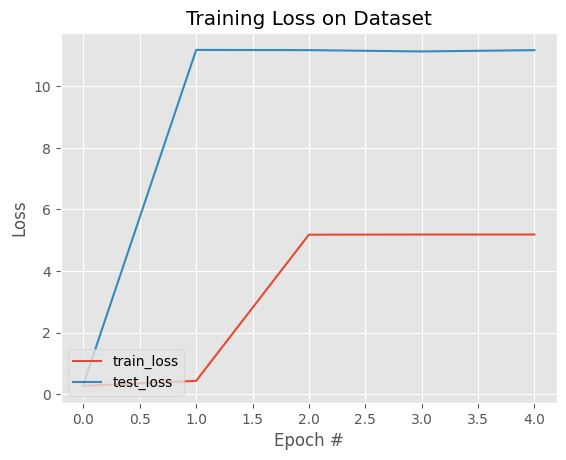

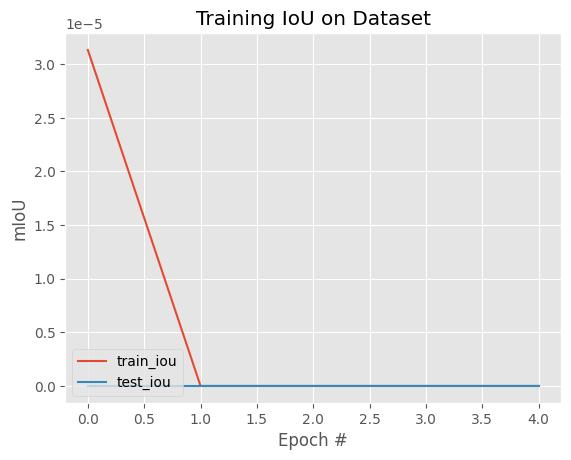

In [ ]:
# Training
if not INFERENCE_MODE:
    print('[INFO] Running in Training Mode')
    # Model
    unet = Unet().to(DEVICE)
    # Loss Function
    lossFunc = nn.BCELoss()
    # Optimizer
    opt = torch.optim.Adam(unet.parameters(), lr=INIT_LR)
    # calculate steps per epoch for training and test set
    trainSteps = len(train_dataset) // BATCH_SIZE
    testSteps = len(test_dataset) // BATCH_SIZE
    # initialize a dictionary to store training history
    H = {"train_loss": [], "test_loss": [], "train_iou": [], "test_iou": []}
    current = 0
    # loop over epochs
    print("[INFO] training the network...")
    startTime = time.time()
    for e in tqdm(range(NUM_EPOCHS), position=0, leave=True):
        # set the model in training mode
        unet.train()
        # initialize the total training and validation loss
        totalTrainLoss = 0
        totalTestLoss = 0
        totalTrainIoU = 0
        totalTestIoU = 0 
        # loop over the training set
        for (i, (x, y)) in tqdm(enumerate(trainLoader), leave=True, position=0):
            # Input, Weights and Target must be all of the same type (FloatTensor)  
            x, y = x.type(torch.FloatTensor),y.type(torch.FloatTensor)
            # Pytorch takes (N,C,H,W) format
            x = x.permute(0,3,1,2)
            y = y.permute(0,3,1,2)
            # send the input to the device
            (x, y) = (x.to(DEVICE), y.to(DEVICE))
            # perform a forward pass and calculate the training loss
            pred = unet(x)
            loss = lossFunc(pred, y)
            # first, zero out any previously accumulated gradients, then
            # perform backpropagation, and then update model parameters
            opt.zero_grad()
            loss.backward()
            opt.step()
            # add the loss to the total training loss so far
            totalTrainLoss += loss
            # Calculate mIoU
            jaccard = JaccardIndex(task="binary",num_classes=2).to(DEVICE)
            target_iou = y.type(torch.IntTensor).to(DEVICE)
            iou = jaccard(pred, target_iou)
            totalTrainIoU += iou
        # switch off autograd
        with torch.no_grad():
            # set the model in evaluation mode
            unet.eval()
            # loop over the validation set
            for (x, y) in testLoader:
                # Input, Weights and Target must be all of the same type (FloatTensor)  
                x, y = x.type(torch.FloatTensor),y.type(torch.FloatTensor)
                # Pytorch takes (N,C,H,W) format
                x = x.permute(0,3,1,2)
                y = y.permute(0,3,1,2)
                # send the input to the device
                (x, y) = (x.to(DEVICE), y.to(DEVICE))
                # make the predictions and calculate the validation loss
                pred = unet(x)
                totalTestLoss += lossFunc(pred, y)
                # Calculate mIoU
                jaccard = JaccardIndex(task="binary",num_classes=2).to(DEVICE)
                target_iou = y.type(torch.IntTensor).to(DEVICE)
                iou = jaccard(pred, target_iou)
                totalTestIoU += iou

        # calculate the average training and validation loss
        avgTrainLoss = totalTrainLoss / trainSteps
        avgTestLoss = totalTestLoss / testSteps
        avgTrainIoU = totalTrainIoU / trainSteps
        avgTestIoU = totalTestIoU / testSteps
        # update our training history
        H["train_loss"].append(avgTrainLoss.cpu().detach().numpy())
        H["test_loss"].append(avgTestLoss.cpu().detach().numpy())
        H["train_iou"].append(avgTrainIoU.cpu().detach().numpy())
        H["test_iou"].append(avgTestIoU.cpu().detach().numpy())
        # print the model training and validation information
        print("[INFO] EPOCH: {}/{}".format(e + 1, NUM_EPOCHS))
        print("Train loss: {:.4f}, Train IoU: {:.4f}, Test loss: {:.4f}, Test IoU: {:.4f}".format(
            avgTrainLoss, avgTrainIoU, avgTestLoss, avgTestIoU))

        # Save Model
        # Save model only if IoU test iou increased
        if current < avgTestIoU:
            torch.save({
                        'epoch': e,
                        'model_state_dict': unet.state_dict(),
                        'optimizer_state_dict': opt.state_dict(),
                        'loss': avgTestLoss,
                        'miou': avgTestIoU
                        }, os.path.join(MODEL_DIR, 'unet-model-{}-{:.4f}.pt'.format(e, avgTestIoU)))
            print('[INFO] Model Checkpoint Saved')
            current = avgTestIoU

    # display the total time needed to perform the training
    endTime = time.time()
    print("[INFO] total time taken to train the model: {:.2f}s".format(
        endTime - startTime))
    

    # Plots
    # plot the training loss
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(H["train_loss"], label="train_loss")
    plt.plot(H["test_loss"], label="test_loss")
    plt.title("Training Loss on Dataset")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss")
    plt.legend(loc="lower left")
    plt.savefig(os.path.join(RESULTS_DIR, 'loss_epoch.png'))
    plt.show()

    # plot mIoU
    plt.figure()
    plt.plot(H["train_iou"], label="train_iou")
    plt.plot(H["test_iou"], label="test_iou")
    plt.title("Training IoU on Dataset")
    plt.xlabel("Epoch #")
    plt.ylabel("mIoU")
    plt.legend(loc="lower left")
    plt.savefig(os.path.join(RESULTS_DIR, 'iou_epoch.png'))
    plt.show()

# Download Pre-trained Model Weights inside checkpoints folder

In [ ]:
!wget -O ./unet-model-58-0.7345.pt "https://www.dropbox.com/s/k3xzhw5wu7v26at/unet-model-58-0.7345.pt?dl=0?dl=1"
!mv './unet-model-58-0.7345.pt' '/content/checkpoints'


--2022-12-18 04:49:36--  https://www.dropbox.com/s/k3xzhw5wu7v26at/unet-model-58-0.7345.pt?dl=0?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/k3xzhw5wu7v26at/unet-model-58-0.7345.pt [following]
--2022-12-18 04:49:36--  https://www.dropbox.com/s/raw/k3xzhw5wu7v26at/unet-model-58-0.7345.pt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc49b9a1b89049c6aceb19b64676.dl.dropboxusercontent.com/cd/0/inline/By0ty0bb71wpxJMRssKX1iAQiABGWDCJkYM4Sqm6_WeoImU4Nkb8ADnt-Gnhl8WSk1x355IvXnv3wDAEPMKHgZY_CSDt-dkxj6Z0hD9u7wUVBIebkw3pZ9e_23s6CSSadVWx8k0PhUWac5uZrzbEs8hfw4U16ec7HVoBM8xV8d1I3A/file# [following]
--2022-12-18 04:49:37--  https://uc49b9a1b89049c6aceb19b64676.dl.dropboxusercontent.com/cd/0/inline/By0ty0bb71wpxJMRssKX1iAQiABGWDCJkY

## Pretrained Model Plots
<img src='https://drive.google.com/uc?id=17Wr2CBz5zla7b2jAoN2INXixa_MGndE2'>

<img src='https://drive.google.com/uc?id=1kGyHd6yyLNoWgvYmxG8VhJP5w4IC_7e4'>



# Inference (Need to change checkpoint name after training)


 is for inference.
For training, change INFERENCE_MODE to 0.

A pre-trained model's checkpoint has been loaded already. You can directly run this checkpoint to observe results.

In [ ]:
INFERENCE_MODE = 1
if INFERENCE_MODE:
    print('[INFO] Running in Inference Mode')
    # filename of best checkpoint
    checkpoint_name = 'unet-model-58-0.7345.pt'  # Change checkpoint Name here from 'checkpoints folder'
    # Load Randomly initialized UNet
    unet = Unet().to(DEVICE)
    # load pretrained weights to the model
    checkpoint = torch.load(os.path.join(MODEL_DIR, checkpoint_name))
    unet.load_state_dict(checkpoint['model_state_dict'])
    # evaluate mode
    unet.eval()
    
    # inference
    # SInce there are augmentations involved, average over NUM_TEST_RUNS runs on the test set
    totalSteps = len(test_dataset) / BATCH_SIZE
    iou_iter = 0
    for i in tqdm(range(NUM_TEST_RUNS), position=0, leave=True):
        totalIoU = 0
        for x, y in testLoader:
            x, y = x.type(torch.FloatTensor), y.type(torch.FloatTensor)
            # Pytorch takes (N,C,H,W) format
            x = x.permute(0,3,1,2)
            y = y.permute(0,3,1,2)
            # send the input to the device
            (x, y) = (x.to(DEVICE), y.to(DEVICE))
            # make the predictions and calculate the validation loss
            pred = unet(x)
            # Calculate mIoU
            jaccard = JaccardIndex(task="binary",num_classes=2).to(DEVICE)
            target_iou = y.type(torch.IntTensor).to(DEVICE)
            iou = jaccard(pred, target_iou)
            totalIoU += iou
        iou_iter += (totalIoU / totalSteps)
    print('MIoU on Test Set = {:.4f}'.format((iou_iter / NUM_TEST_RUNS).cpu().detach().numpy()))

[INFO] Running in Inference Mode


100%|██████████| 5/5 [00:11<00:00,  2.36s/it]

MIoU on Test Set = 0.5138


# Qualitative Results for Visualization

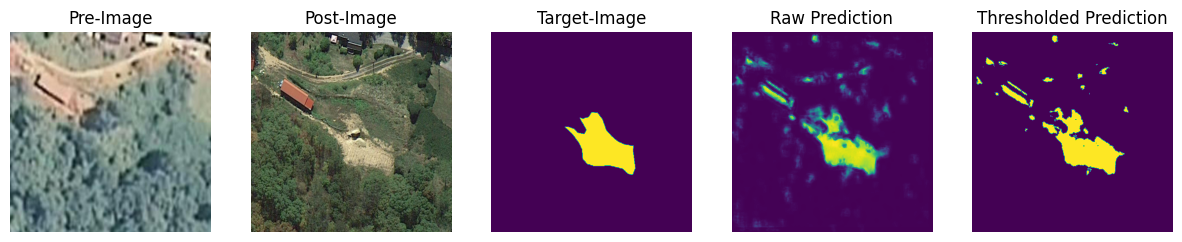

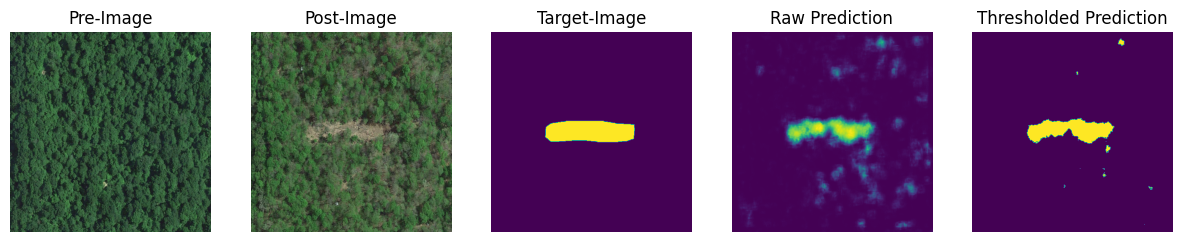

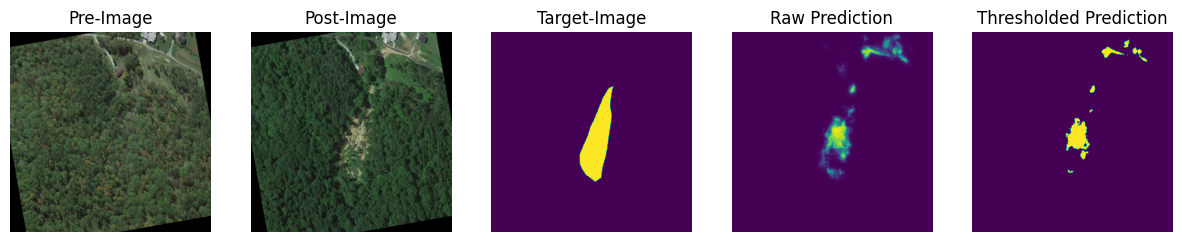

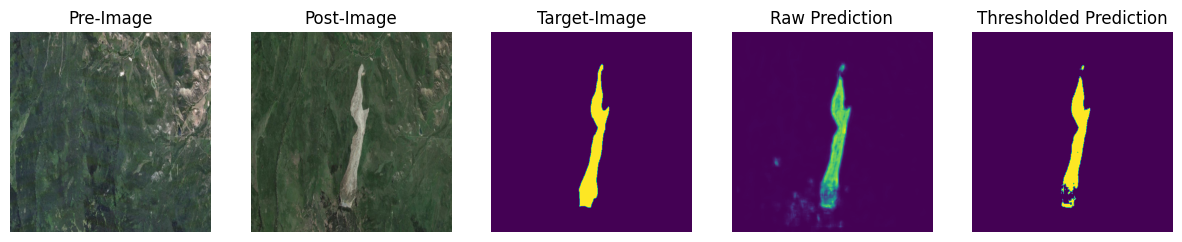

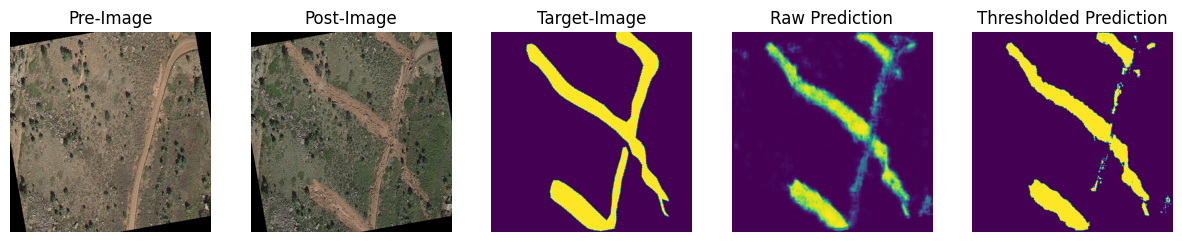

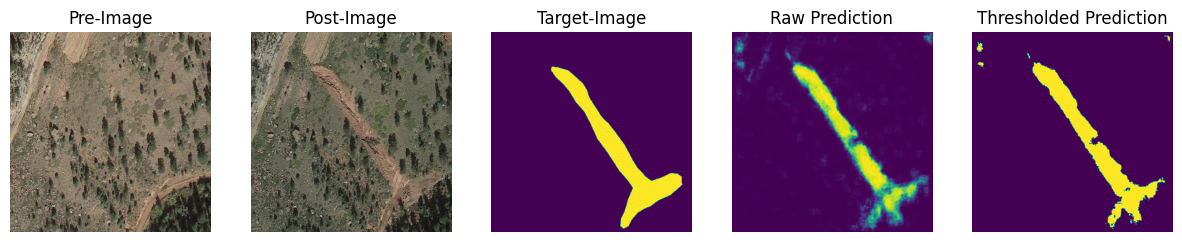

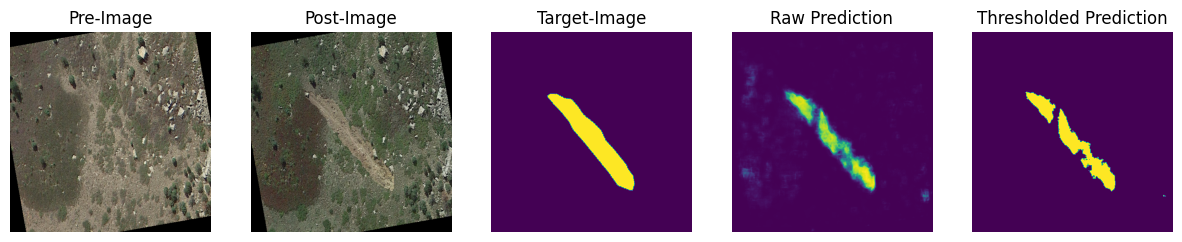

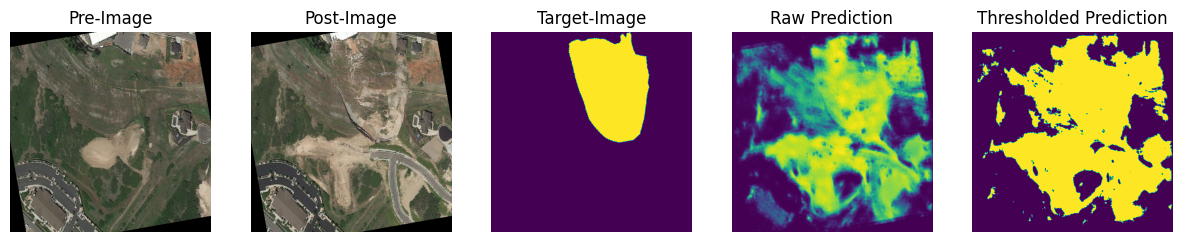

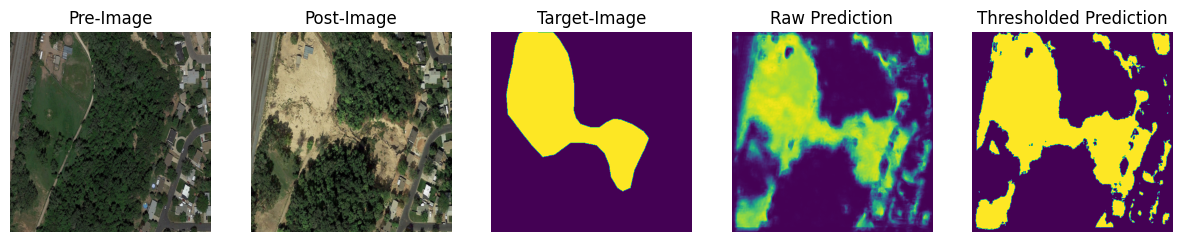

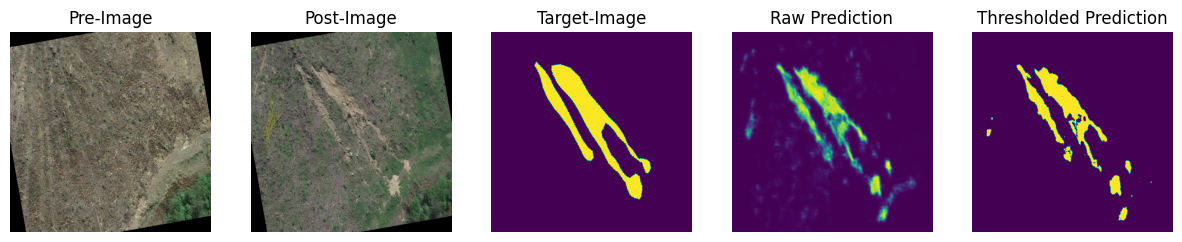

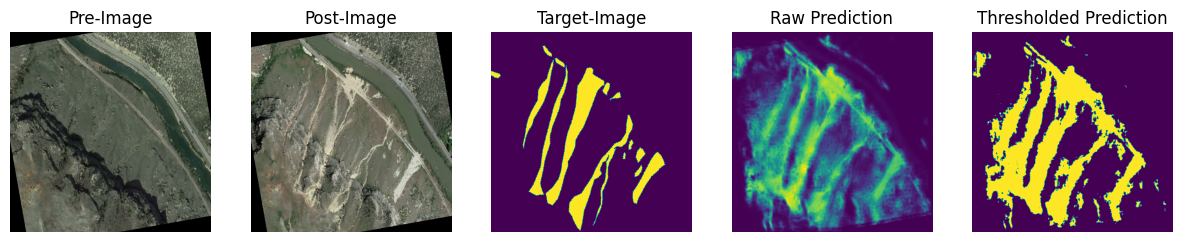

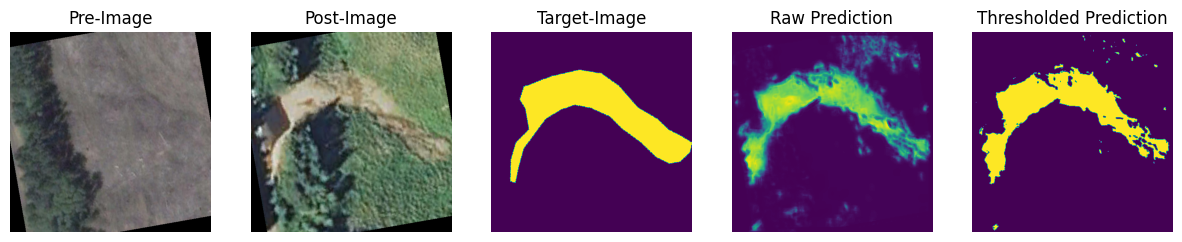

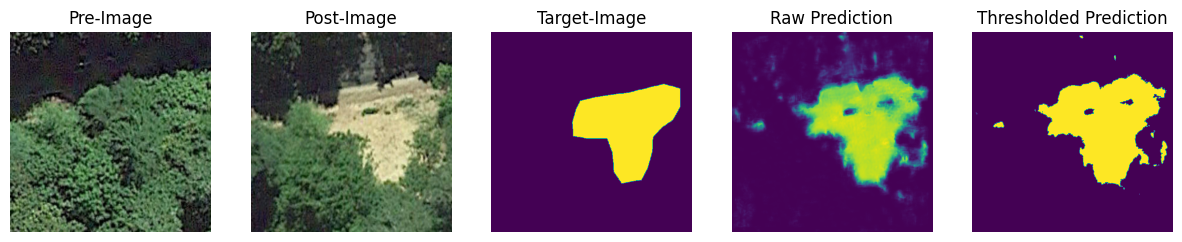

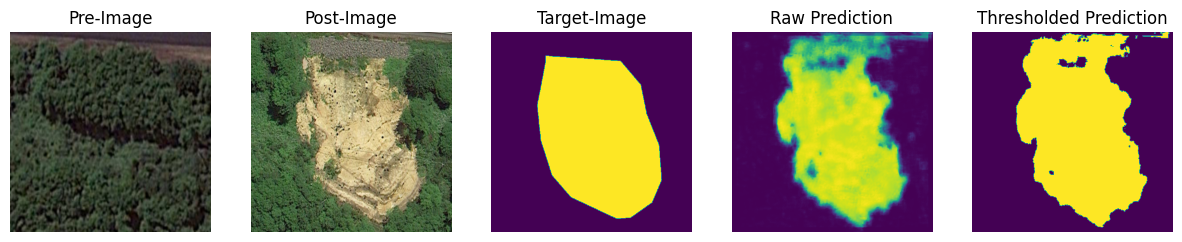

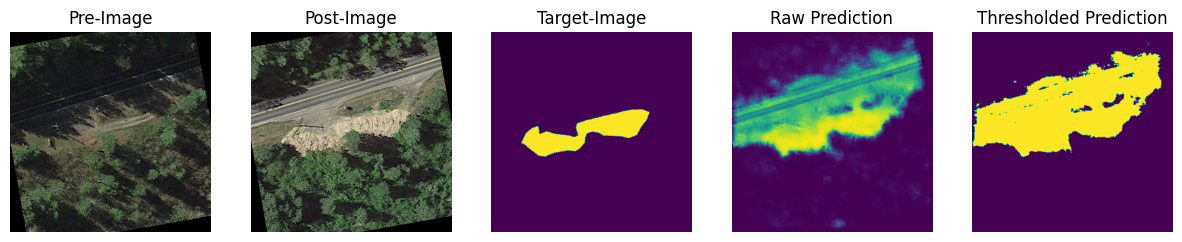

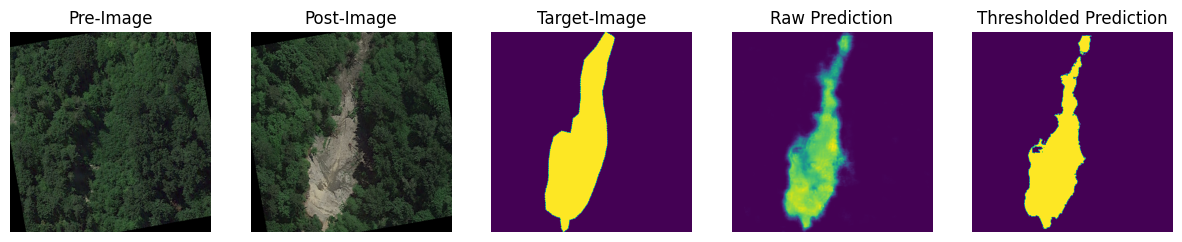

In [ ]:
plt.rcParams.update(plt.rcParamsDefault)
for i in range(4,len(test_dataset)):
    sample = test_dataset[i]
    fig, axs = plt.subplots(1,5,figsize=(15,5))
    axs[0].imshow(sample[0].numpy()[:,:,:3])
    axs[0].axis('off')
    axs[0].set_title('Pre-Image')
    axs[1].imshow(sample[0].numpy()[:,:,3:])
    axs[1].axis('off')
    axs[1].set_title('Post-Image')
    axs[2].imshow(sample[1][:,:,0])
    axs[2].axis('off')
    axs[2].set_title('Target-Image')
    x = torch.unsqueeze(sample[0].permute(2,0,1), 0).type(torch.FloatTensor).to(DEVICE)
    pred = unet(x)
    axs[3].imshow(pred[0][0].cpu().detach().numpy())
    axs[3].axis('off')
    axs[3].set_title('Raw Prediction')
    pred[torch.where(pred >= 0.4)] = 1
    pred[torch.where(pred < 0.4)] = 0
    axs[4].imshow(pred[0][0].cpu().detach().numpy())
    axs[4].axis('off')
    axs[4].set_title('Thresholded Prediction')
    plt.show()